In [2]:
# Data https://www.kaggle.com/datasets/shenba/time-series-datasets?select=Electric_Production.csv

import pandas as pd

electric_data = pd.read_csv('Electric_Production.csv')
electric_data



,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


The null value in the missing data are DATE          0
IPG2211A2N    0
dtype: int64


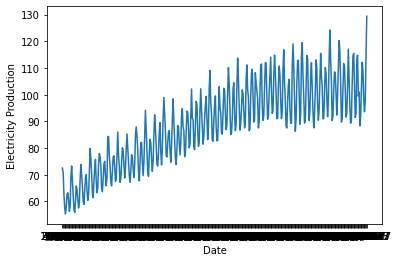

In [7]:
# check if there is any missing data
print('The null value in the missing data are',electric_data.isnull().sum())
# plot the time series data
import matplotlib.pyplot as plt
plt.plot(electric_data['DATE'], electric_data['IPG2211A2N'])
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.show()
# first three years for the pattern

In [9]:
## Stationarity Test using ADF Test

from statsmodels.tsa.stattools import adfuller
electric_data = pd.read_csv('Electric_Production.csv')

# Make sure the 'DATE' column is in datetime format
electric_data['DATE'] = pd.to_datetime(electric_data['DATE'])

# Set the 'DATE' column as the index
electric_data.set_index('DATE', inplace=True)

# Apply the ADF test on the time series
result = adfuller(electric_data['IPG2211A2N'])

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


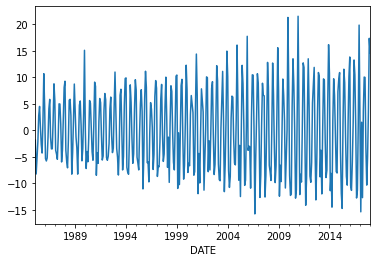

In [10]:
## Differencing the Time Series Data

electric_data_diff = electric_data['IPG2211A2N'].diff()

# Drop the missing values that result from differencing
electric_data_diff = electric_data_diff.dropna()

electric_data_diff.plot()
plt.show()

In [12]:
# perform adf test for this one the differenced data, log transformation before differencing I (for non_constance variance)

result_diff = adfuller(electric_data_diff)

# Output the results
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -7.104891
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


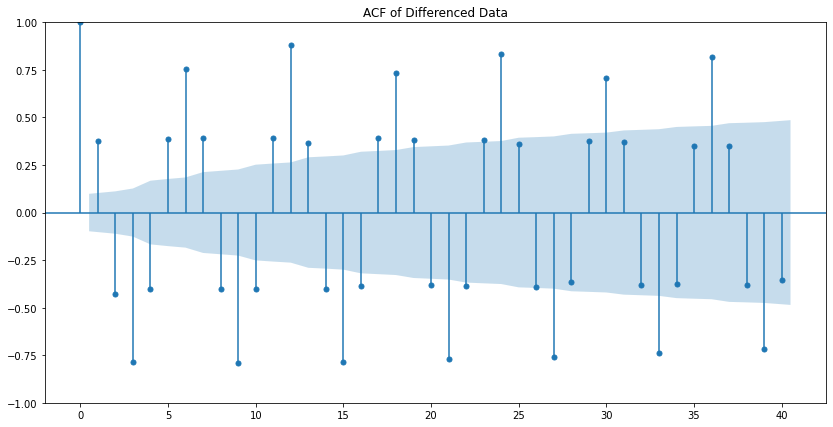

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


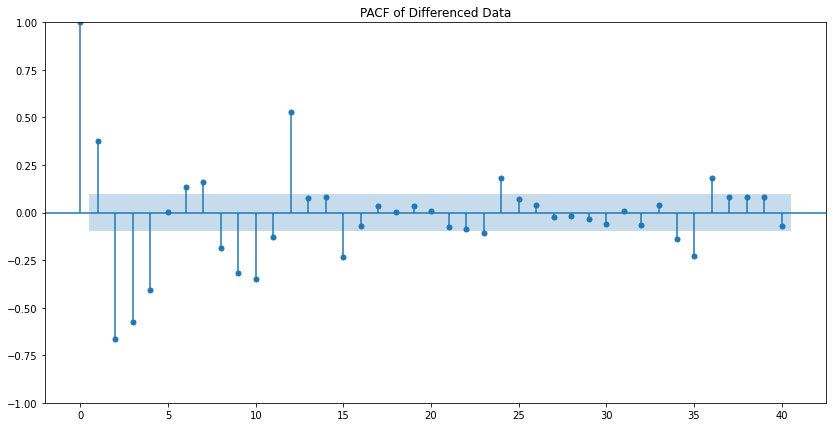

In [13]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Load your dataset
electric_data = pd.read_csv('Electric_Production.csv')

# Convert the 'DATE' column to datetime and set it as the index
electric_data['DATE'] = pd.to_datetime(electric_data['DATE'])
electric_data.set_index('DATE', inplace=True)

# Differencing the data if it is not already stationary
electric_data_diff = electric_data['IPG2211A2N'].diff().dropna()

# Plot the ACF
plt.figure(figsize=(14,7))
plot_acf(electric_data_diff, ax=plt.gca(), lags=40)
plt.title('ACF of Differenced Data')
plt.show()

# Plot the PACF
plt.figure(figsize=(14,7))
plot_pacf(electric_data_diff, ax=plt.gca(), lags=40)
plt.title('PACF of Differenced Data')
plt.show()
# seasonal differencing to elimate the seaconal trend

In [15]:
## AIC value for some possible ARIMA models
from statsmodels.tsa.arima.model import ARIMA

models = [(1,1,0), (0,1,1), (1,1,1)]
for model_order in models:
    model = ARIMA(electric_data_diff, order=model_order)
    model_fit = model.fit()

    print(f'ARIMA{model_order} AIC: {model_fit.aic}')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(1, 1, 0) AIC: 2821.7366981623263
ARIMA(0, 1, 1) AIC: 2814.0116242108716
ARIMA(1, 1, 1) AIC: 2691.0084050839423


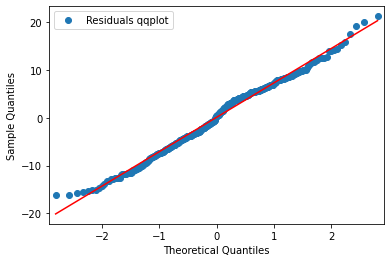

Residuals mean:  0.11900770800964396


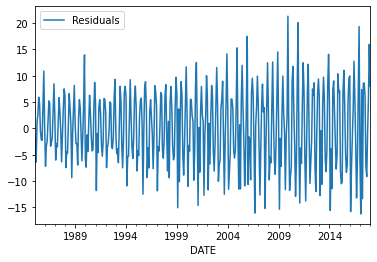

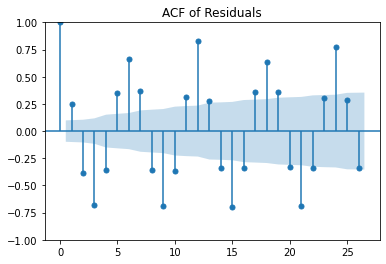

In [17]:
import statsmodels.api as sm

# ARIMA(1,1,1) is the best one base on AIC

# 1. Conduct Diagnostic Checks
residuals = model_fit.resid
fig = sm.qqplot(residuals, line='s')  # Q-Q plot
plt.legend(['Residuals qqplot'])
plt.show()

print('Residuals mean: ', residuals.mean())

# Plotting the residuals to see if there is any obvious seasonality or trend
residuals.plot()
plt.legend(['Residuals'])
plt.show()

# ACF plot of the residuals to check for autocorrelation
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.show()


